In [25]:
!pip install striprtf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, classification_report,recall_score


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
from google.colab import files
 
 
uploaded = files.upload()

Saving spam.csv to spam.csv


In [8]:
df=pd.read_csv('spam.csv', encoding='latin-1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
print(df.shape)
# 1. cleaning 
#2. EDA
# 3. vectorization
#4. model building 


# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

df.rename(columns={'v1':'target','v2':'emails'},inplace=True)
#set ham=0
# spam =1
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])
#df.head()

(5572, 5)


In [10]:
#check missing values
df.isnull().sum()

target    0
emails    0
dtype: int64

In [11]:
#check for duplicates
df.duplicated().sum()

403

In [12]:
#remove duplicates
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [13]:
#percentage of spam and ham
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


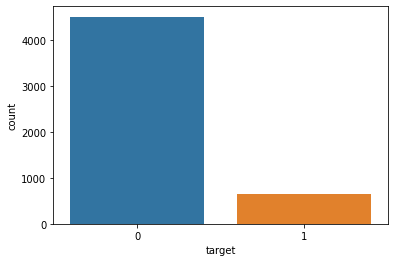

In [14]:
#data is imbalanced
sns.countplot(df['target'])

In [15]:
#Data Preprocessing
#lower case
#tokenization
#removing special characters
#removing stop words
#stemming
ps=PorterStemmer()
import string

def transform_text(text):
    #lower case
    text=text.lower()
    
    #tokenization
    
    text=nltk.word_tokenize(text)#text is converted to a list
    #removing special char
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    #removing stop words
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)
    
    

In [16]:
#making a transformed column
df['emails']=df['emails'].apply(transform_text)
df.head()

,target,emails
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli hor u c alreadi say
4,0,nah think goe usf live around though


In [17]:
#Model building 
#we need to vectorize words
cv=CountVectorizer()
X=cv.fit_transform(df['emails']).toarray()
print(X.shape)
Y=df['target'].values

(5169, 6708)


In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
#print(X_train.shape,
#X_test.shape,
#Y_train.shape,
#Y_test.shape)
#print(X)

## **Logistic regression implementation**

In [19]:
#Logistic regression implementation
def hypothesis(X,theta):
    '''
    theta^T X
    X-entire array (m,n+1)
    theta-array(n+1,1)
    to instert one dummy feature
    '''
    return 1.0/(1.0+np.exp(-(np.dot(X,theta))))
    
#find optimal val of theta that minimize error

def error(X,y,theta):
    '''
    y- (m,1)-4135
    X-entire array (m,n+1)
    theta-array(n+1,1)
    vectorize code
    return scaler_val=loss
    '''
    hi=hypothesis(X,theta)
    e=-1*np.mean((y*np.log(hi))+((1-y)*np.log(1-hi)))
    
    return e
    
    

In [20]:
#grad desc
def gradient(X,y,theta):
    '''
    return grad_vect-(n+1,1)
    '''
    hi=hypothesis(X,theta)
    grad= -np.dot(X.T,(y-hi))
    m=X.shape[0]
    return grad/m
def gradient_descent(X,y,lr=0.5,max_itr=4000):
    
    n=X.shape[1]
    theta= np.zeros((n,1))
    #print(theta.shape)
    error_list=[]
    for i in range(max_itr):
        err=error(X,y,theta)
        error_list.append(err)
        
        grad=gradient(X,y,theta)
        
        #update
        theta=theta - (lr*grad)
        
    return theta,error_list 
    

In [21]:
ones= np.ones((X_train.shape[0],1)) #appending an extra column to make calculation easier
X_new=np.hstack((ones,X_train))
print(X_new.shape)
Y_train=Y_train.reshape((-1,1))

(4135, 6709)


(6709, 1)
(1034, 6709)


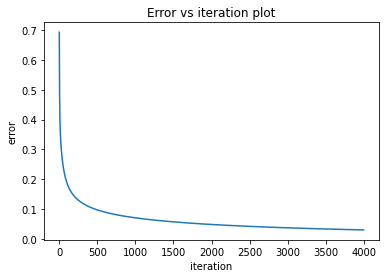

In [52]:
theta, err_list=gradient_descent(X_new,Y_train)
print(theta.shape)
plt.plot(err_list)
plt.xlabel('iteration')
plt.ylabel("error")
plt.title("Error vs iteration plot")
X_new_test=np.hstack((np.ones((X_test.shape[0],1)),X_test))
print(X_new_test.shape)


In [54]:
def predict(X,theta):
    h=hypothesis(X,theta)
    #print(theta.shape)
    output=np.zeros(h.shape)
    output[h>0.4]=1
    #print(h)
    output=output.astype('int')
    return output
Y_pred=predict(X_new_test,theta)
#print(X_train_pred.shape)


print("Classification Report")
print(classification_report(Y_pred, Y_test))
print("Accuracy",accuracy_score(Y_pred,Y_test))
print("Precision",precision_score(Y_pred,Y_test))
print("Recall",recall_score(Y_pred,Y_test))
print("F1 Score",f1_score(Y_pred,Y_test))

#print("Accuracy on train data",accuracy(Y_test,X_test_pred))
#print(precision_score(Y_test,X_test_pred))


Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       909
           1       0.89      0.98      0.94       125

    accuracy                           0.98      1034
   macro avg       0.94      0.98      0.96      1034
weighted avg       0.98      0.98      0.98      1034

Accuracy 0.9835589941972921
Precision 0.8913043478260869
Recall 0.984
F1 Score 0.9353612167300379


In [56]:
# Reading Test Data
import os
import re
from striprtf.striprtf import rtf_to_text
file = os.listdir('test/')
test_data = []

for mail in file:
    with open('test/'+mail) as infile:
        content = infile.read()
        text = rtf_to_text(content)
    test_data.append(text)   
# Testing On Test Data 
test_data1= [transform_text(x) for x in test_data]
test_data1 = cv.transform(test_data).toarray()
new_test=np.hstack((np.ones((test_data1.shape[0],1)),test_data1))
pred = predict(new_test,theta)
for i in range(len(pred)):
    if pred[i] == 1:
        res = "spam\n"
    else:
        res = 'ham\n'
    print(res,'  ------ ',test_data[i])

spam
   ------  Dear Beneficiary,The United Nations Compensation Commission (UNCC) has approved to pay you a compensation amount of US$1,500,000 (One Million, Five Hundred Thousand United State Dollars) due to losses and damages suffered as to delayed foreign contract payment of individuals, firms, contractors, inheritance, next-of-kin, super hurricane Sandy and lottery beneficiaries that originated from Africa, Europe, Americas, Asia including the Middle East. Your approved Compensation package has been deposited in the "Security Vault of SunWay Finance & Security company USA" waiting for delivery. For identification and swift delivery of your compensation package, you are advice to contact Diplomat Ellis Gammon of SunWay Finance & Security company and re-confirm your delivery details: call Tel: +1 321 586 1802, E-mail: ellisgammon8@gmail.com1. Full Name:2. Delivery Address:3. Direct Phone Number:4. Nearest Airport:5. Age/Occupation:Congratulations on your payment approvalYours faithf

## **SVM Implementation**

In [59]:
from sklearn.svm import SVC
classifier = SVC(kernel ='rbf', random_state = 0)
classifier.fit(X_train, Y_train)

print("Accuracy",classifier.score(X_test,Y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.9709864603481625


In [42]:
# Reading Test Data
import os
import re
from striprtf.striprtf import rtf_to_text

file = os.listdir('test/')
test_data = []

for mail in file:
    with open('test/'+mail) as infile:
        content = infile.read()
        text = rtf_to_text(content)
    test_data.append(text)
    




# Testing On Test Data
test_data1= [transform_text(x) for x in test_data]
test_data1 = cv.transform(test_data).toarray()
Y1=[1,0]
pred = classifier.predict(test_data1)
for i in range(len(pred)):
    if pred[i] == 1:
        res = "spam"
    else:
        res = 'ham'
    print(res,'  ------ ',test_data[i])

ham   ------  Dear Beneficiary,The United Nations Compensation Commission (UNCC) has approved to pay you a compensation amount of US$1,500,000 (One Million, Five Hundred Thousand United State Dollars) due to losses and damages suffered as to delayed foreign contract payment of individuals, firms, contractors, inheritance, next-of-kin, super hurricane Sandy and lottery beneficiaries that originated from Africa, Europe, Americas, Asia including the Middle East. Your approved Compensation package has been deposited in the "Security Vault of SunWay Finance & Security company USA" waiting for delivery. For identification and swift delivery of your compensation package, you are advice to contact Diplomat Ellis Gammon of SunWay Finance & Security company and re-confirm your delivery details: call Tel: +1 321 586 1802, E-mail: ellisgammon8@gmail.com1. Full Name:2. Delivery Address:3. Direct Phone Number:4. Nearest Airport:5. Age/Occupation:Congratulations on your payment approvalYours faithful